In [1]:
from lms2 import DrahixMicrogridV2, Time, pplot

from pyomo.environ import TransformationFactory, SolverFactory
import matplotlib.pyplot as plt
import pandas as pd
import os
import time


def to_seconds(timedelta):
    return timedelta.days * 24 * 3600 + timedelta.seconds + timedelta.microseconds / 1e6


In [18]:
os.chdir('/home/admin/Documents/02-Recherche/02-Python/pypeper/')
usecols = ['Date and time (UTC)', 'TGBT', 'Pmax']
df = pd.read_csv('pypeper/data/DrahiX_SIRTA_eCO2mix_20160715_20180930.csv',
                 usecols=usecols, index_col=0, parse_dates=True, dayfirst=True)


In [19]:
# selecting time period and time discretization
t_start = '2017-01-01 00:00:00'
t_end = '2017-06-01 00:00:00'
freq = '15Min'

t = Time(t_start, t_end, freq=freq)
df = df[t_start:t_end]

# change index from timestamps to second
df.index = to_seconds(df.index - df.index[0])
df['Pmax'] = df['Pmax'].fillna(0)/1000
df.rename(columns={'Pmax': 'P_pv', 'TGBT': 'P_load'}, inplace=True)

df = df.apply(lambda x: round(x, 3))

In [20]:
print(df.P_load.index)

Float64Index([       0.0,     1800.0,     3600.0,     5400.0,     7200.0,
                  9000.0,    10800.0,    12600.0,    14400.0,    16200.0,
              ...
              13030200.0, 13032000.0, 13033800.0, 13035600.0, 13037400.0,
              13039200.0, 13041000.0, 13042800.0, 13044600.0, 13046400.0],
             dtype='float64', name='Date and time (UTC)', length=7249)


In [21]:
m = DrahixMicrogridV2(name='m', dataframe=df)

m.obj = m.construct_objective_from_expression_list(m.t, m.mg.instant_cost, m.ps.instant_cost)
# m.construct_objective_from_tagged_expression()

# m.ps.scale_fact.setlb(10)
# m.ps.scale_fact.setub(500)
m.ps.scale_fact.fix(200)


In [22]:
t1 = time.time()
discretizer = TransformationFactory('dae.finite_difference')
discretizer.apply_to(m, nfe=t.nfe)  # BACKWARD or FORWARD
t2 = time.time() - t1
print(f'Elapsed time for discretization : \t {t2}')


Elapsed time for discretization : 	 15.510667562484741


In [23]:
m.pprint()

1 Expression Declarations
    new_int : Size=1, Index=None


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                 4098600.0 :  None :     0 :  None : False : False :  Reals
                 4099500.0 :  None :     0 :  None : False : False :  Reals
                 4100400.0 :  None :     0 :  None : False : False :  Reals
                 4101300.0 :  None :     0 :  None : False : False :  Reals
                 4102200.0 :  None :     0 :  None : False : False :  Reals
                 4103100.0 :  None :     0 :  None : False : False :  Reals
                 4104000.0 :  None :     0 :  None : False : False :  Reals
                 4104900.0 :  None :     0 :  None : False : False :  Reals
                 4105800.0 :  None :     0 :  None : False : False :  Reals
                 4106700.0 :  None :     0 :  None : False : False :  Reals
                 4107600.0 :  None :     0 :  None : False : False :  Reals
                 4108500.0 :  None :     0 :  None : False : False :  Reals
                 4109400.0 :  None :     0 :  None : False : False :  Reals
            

                10397700.0 :  None :     0 :  None : False : False :  Reals
                10398600.0 :  None :     0 :  None : False : False :  Reals
                10399500.0 :  None :     0 :  None : False : False :  Reals
                10400400.0 :  None :     0 :  None : False : False :  Reals
                10401300.0 :  None :     0 :  None : False : False :  Reals
                10402200.0 :  None :     0 :  None : False : False :  Reals
                10403100.0 :  None :     0 :  None : False : False :  Reals
                10404000.0 :  None :     0 :  None : False : False :  Reals
                10404900.0 :  None :     0 :  None : False : False :  Reals
                10405800.0 :  None :     0 :  None : False : False :  Reals
                10406700.0 :  None :     0 :  None : False : False :  Reals
                10407600.0 :  None :     0 :  None : False : False :  Reals
                10408500.0 :  None :     0 :  None : False : False :  Reals
            

                 1845000.0 :  None :     0 :  None : False : False :  Reals
                 1845900.0 :  None :     0 :  None : False : False :  Reals
                 1846800.0 :  None :     0 :  None : False : False :  Reals
                 1847700.0 :  None :     0 :  None : False : False :  Reals
                 1848600.0 :  None :     0 :  None : False : False :  Reals
                 1849500.0 :  None :     0 :  None : False : False :  Reals
                 1850400.0 :  None :     0 :  None : False : False :  Reals
                 1851300.0 :  None :     0 :  None : False : False :  Reals
                 1852200.0 :  None :     0 :  None : False : False :  Reals
                 1853100.0 :  None :     0 :  None : False : False :  Reals
                 1854000.0 :  None :     0 :  None : False : False :  Reals
                 1854900.0 :  None :     0 :  None : False : False :  Reals
                 1855800.0 :  None :     0 :  None : False : False :  Reals
            

                 9044100.0 :  None :     0 :  None : False : False :  Reals
                 9045000.0 :  None :     0 :  None : False : False :  Reals
                 9045900.0 :  None :     0 :  None : False : False :  Reals
                 9046800.0 :  None :     0 :  None : False : False :  Reals
                 9047700.0 :  None :     0 :  None : False : False :  Reals
                 9048600.0 :  None :     0 :  None : False : False :  Reals
                 9049500.0 :  None :     0 :  None : False : False :  Reals
                 9050400.0 :  None :     0 :  None : False : False :  Reals
                 9051300.0 :  None :     0 :  None : False : False :  Reals
                 9052200.0 :  None :     0 :  None : False : False :  Reals
                 9053100.0 :  None :     0 :  None : False : False :  Reals
                 9054000.0 :  None :     0 :  None : False : False :  Reals
                 9054900.0 :  None :     0 :  None : False : False :  Reals
            

                  491400.0 :  None :     0 :  None : False : False :  Reals
                  492300.0 :  None :     0 :  None : False : False :  Reals
                  493200.0 :  None :     0 :  None : False : False :  Reals
                  494100.0 :  None :     0 :  None : False : False :  Reals
                  495000.0 :  None :     0 :  None : False : False :  Reals
                  495900.0 :  None :     0 :  None : False : False :  Reals
                  496800.0 :  None :     0 :  None : False : False :  Reals
                  497700.0 :  None :     0 :  None : False : False :  Reals
                  498600.0 :  None :     0 :  None : False : False :  Reals
                  499500.0 :  None :     0 :  None : False : False :  Reals
                  500400.0 :  None :     0 :  None : False : False :  Reals
                  501300.0 :  None :     0 :  None : False : False :  Reals
                  502200.0 :  None :     0 :  None : False : False :  Reals
            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                Key        : Lower : Body               : Upper     : Active
                       0.0 :  -Inf :        bat1.e[0.0] : bat1.emax :   True
                     900.0 :  -Inf :      bat1.e[900.0] : bat1.emax :   True
                    1800.0 :  -Inf :     bat1.e[1800.0] : bat1.emax :   True
                    2700.0 :  -Inf :     bat1.e[2700.0] : bat1.emax :   True
                    3600.0 :  -Inf :     bat1.e[3600.0] : bat1.emax :   True
                    4500.0 :  -Inf :     bat1.e[4500.0] : bat1.emax :   True
                    5400.0 :  -Inf :     bat1.e[5400.0] : bat1.emax :   True
                    6300.0 :  -Inf :     bat1.e[6300.0] : bat1.emax :   True
                    7200.0 :  -Inf :     bat1.e[7200.0] : bat1.emax :   True
                    8100.0 :  -Inf :     bat1.e[8100.0] : bat1.emax :   True
                    9000.0 :  -Inf :     bat1.e[9000.0] : bat1.emax :   True
                    9900.0 :  -Inf :     bat1.e[9900.0] : bat1.emax :   True

                 6754500.0 :  -Inf :  bat1.e[6754500.0] : bat1.emax :   True
                 6755400.0 :  -Inf :  bat1.e[6755400.0] : bat1.emax :   True
                 6756300.0 :  -Inf :  bat1.e[6756300.0] : bat1.emax :   True
                 6757200.0 :  -Inf :  bat1.e[6757200.0] : bat1.emax :   True
                 6758100.0 :  -Inf :  bat1.e[6758100.0] : bat1.emax :   True
                 6759000.0 :  -Inf :  bat1.e[6759000.0] : bat1.emax :   True
                 6759900.0 :  -Inf :  bat1.e[6759900.0] : bat1.emax :   True
                 6760800.0 :  -Inf :  bat1.e[6760800.0] : bat1.emax :   True
                 6761700.0 :  -Inf :  bat1.e[6761700.0] : bat1.emax :   True
                 6762600.0 :  -Inf :  bat1.e[6762600.0] : bat1.emax :   True
                 6763500.0 :  -Inf :  bat1.e[6763500.0] : bat1.emax :   True
                 6764400.0 :  -Inf :  bat1.e[6764400.0] : bat1.emax :   True
                 6765300.0 :  -Inf :  bat1.e[6765300.0] : bat1.emax :   True

                12357900.0 :  -Inf : bat1.e[12357900.0] : bat1.emax :   True
                12358800.0 :  -Inf : bat1.e[12358800.0] : bat1.emax :   True
                12359700.0 :  -Inf : bat1.e[12359700.0] : bat1.emax :   True
                12360600.0 :  -Inf : bat1.e[12360600.0] : bat1.emax :   True
                12361500.0 :  -Inf : bat1.e[12361500.0] : bat1.emax :   True
                12362400.0 :  -Inf : bat1.e[12362400.0] : bat1.emax :   True
                12363300.0 :  -Inf : bat1.e[12363300.0] : bat1.emax :   True
                12364200.0 :  -Inf : bat1.e[12364200.0] : bat1.emax :   True
                12365100.0 :  -Inf : bat1.e[12365100.0] : bat1.emax :   True
                12366000.0 :  -Inf : bat1.e[12366000.0] : bat1.emax :   True
                12366900.0 :  -Inf : bat1.e[12366900.0] : bat1.emax :   True
                12367800.0 :  -Inf : bat1.e[12367800.0] : bat1.emax :   True
                12368700.0 :  -Inf : bat1.e[12368700.0] : bat1.emax :   True

                Key        : Lower     : Body               : Upper : Active
                       0.0 : bat1.emin :        bat1.e[0.0] :  +Inf :   True
                     900.0 : bat1.emin :      bat1.e[900.0] :  +Inf :   True
                    1800.0 : bat1.emin :     bat1.e[1800.0] :  +Inf :   True
                    2700.0 : bat1.emin :     bat1.e[2700.0] :  +Inf :   True
                    3600.0 : bat1.emin :     bat1.e[3600.0] :  +Inf :   True
                    4500.0 : bat1.emin :     bat1.e[4500.0] :  +Inf :   True
                    5400.0 : bat1.emin :     bat1.e[5400.0] :  +Inf :   True
                    6300.0 : bat1.emin :     bat1.e[6300.0] :  +Inf :   True
                    7200.0 : bat1.emin :     bat1.e[7200.0] :  +Inf :   True
                    8100.0 : bat1.emin :     bat1.e[8100.0] :  +Inf :   True
                    9000.0 : bat1.emin :     bat1.e[9000.0] :  +Inf :   True
                    9900.0 : bat1.emin :     bat1.e[9900.0] :  +Inf :   True

                 4500000.0 : bat1.emin :  bat1.e[4500000.0] :  +Inf :   True
                 4500900.0 : bat1.emin :  bat1.e[4500900.0] :  +Inf :   True
                 4501800.0 : bat1.emin :  bat1.e[4501800.0] :  +Inf :   True
                 4502700.0 : bat1.emin :  bat1.e[4502700.0] :  +Inf :   True
                 4503600.0 : bat1.emin :  bat1.e[4503600.0] :  +Inf :   True
                 4504500.0 : bat1.emin :  bat1.e[4504500.0] :  +Inf :   True
                 4505400.0 : bat1.emin :  bat1.e[4505400.0] :  +Inf :   True
                 4506300.0 : bat1.emin :  bat1.e[4506300.0] :  +Inf :   True
                 4507200.0 : bat1.emin :  bat1.e[4507200.0] :  +Inf :   True
                 4508100.0 : bat1.emin :  bat1.e[4508100.0] :  +Inf :   True
                 4509000.0 : bat1.emin :  bat1.e[4509000.0] :  +Inf :   True
                 4509900.0 : bat1.emin :  bat1.e[4509900.0] :  +Inf :   True
                 4510800.0 : bat1.emin :  bat1.e[4510800.0] :  +Inf :   True

                 9899100.0 : bat1.emin :  bat1.e[9899100.0] :  +Inf :   True
                 9900000.0 : bat1.emin :  bat1.e[9900000.0] :  +Inf :   True
                 9900900.0 : bat1.emin :  bat1.e[9900900.0] :  +Inf :   True
                 9901800.0 : bat1.emin :  bat1.e[9901800.0] :  +Inf :   True
                 9902700.0 : bat1.emin :  bat1.e[9902700.0] :  +Inf :   True
                 9903600.0 : bat1.emin :  bat1.e[9903600.0] :  +Inf :   True
                 9904500.0 : bat1.emin :  bat1.e[9904500.0] :  +Inf :   True
                 9905400.0 : bat1.emin :  bat1.e[9905400.0] :  +Inf :   True
                 9906300.0 : bat1.emin :  bat1.e[9906300.0] :  +Inf :   True
                 9907200.0 : bat1.emin :  bat1.e[9907200.0] :  +Inf :   True
                 9908100.0 : bat1.emin :  bat1.e[9908100.0] :  +Inf :   True
                 9909000.0 : bat1.emin :  bat1.e[9909000.0] :  +Inf :   True
                 9909900.0 : bat1.emin :  bat1.e[9909900.0] :  +Inf :   True

                Key        : Lower : Body                                                                                                              : Upper : Active
                       0.0 :   0.0 :                      bat1.dedt[0.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[0.0] - (1/bat1.etad)*bat1.pd[0.0]) :   0.0 :   True
                     900.0 :   0.0 :                bat1.dedt[900.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[900.0] - (1/bat1.etad)*bat1.pd[900.0]) :   0.0 :   True
                    1800.0 :   0.0 :             bat1.dedt[1800.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[1800.0] - (1/bat1.etad)*bat1.pd[1800.0]) :   0.0 :   True
                    2700.0 :   0.0 :             bat1.dedt[2700.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[2700.0] - (1/bat1.etad)*bat1.pd[2700.0]) :   0.0 :   True
                    3600.0 :   0.0 :             bat1.dedt[3600.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[3600.0] - (1/bat1.etad)*bat1.pd[3600.0]) :   0.0 :

                 6745500.0 :   0.0 :    bat1.dedt[6745500.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[6745500.0] - (1/bat1.etad)*bat1.pd[6745500.0]) :   0.0 :   True
                 6746400.0 :   0.0 :    bat1.dedt[6746400.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[6746400.0] - (1/bat1.etad)*bat1.pd[6746400.0]) :   0.0 :   True
                 6747300.0 :   0.0 :    bat1.dedt[6747300.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[6747300.0] - (1/bat1.etad)*bat1.pd[6747300.0]) :   0.0 :   True
                 6748200.0 :   0.0 :    bat1.dedt[6748200.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[6748200.0] - (1/bat1.etad)*bat1.pd[6748200.0]) :   0.0 :   True
                 6749100.0 :   0.0 :    bat1.dedt[6749100.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[6749100.0] - (1/bat1.etad)*bat1.pd[6749100.0]) :   0.0 :   True
                 6750000.0 :   0.0 :    bat1.dedt[6750000.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[6750000.0] - (1/bat1.etad)*bat1.pd[6750000.0]) :   0.0 :

                12533400.0 :   0.0 : bat1.dedt[12533400.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[12533400.0] - (1/bat1.etad)*bat1.pd[12533400.0]) :   0.0 :   True
                12534300.0 :   0.0 : bat1.dedt[12534300.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[12534300.0] - (1/bat1.etad)*bat1.pd[12534300.0]) :   0.0 :   True
                12535200.0 :   0.0 : bat1.dedt[12535200.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[12535200.0] - (1/bat1.etad)*bat1.pd[12535200.0]) :   0.0 :   True
                12536100.0 :   0.0 : bat1.dedt[12536100.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[12536100.0] - (1/bat1.etad)*bat1.pd[12536100.0]) :   0.0 :   True
                12537000.0 :   0.0 : bat1.dedt[12537000.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[12537000.0] - (1/bat1.etad)*bat1.pd[12537000.0]) :   0.0 :   True
                12537900.0 :   0.0 : bat1.dedt[12537900.0] - 0.0002777777777777778*(bat1.etac*bat1.pc[12537900.0] - (1/bat1.etad)*bat1.pd[12537900.0]) :   0.0 :

In [17]:
# m.construct_integrals()
# opt = SolverFactory("gurobi", solver_io="direct")
opt = SolverFactory("glpk")
# opt = SolverFactory("cbc")

t1 = time.time()
# opt.options['tmlim'] = 120
# opt.options['allow'] = 0.1
results = opt.solve(m, tee=False) # tee = true for more outpus
t2 = time.time() - t1
print(f'Elapsed time : \t {t2}')

print(results)
print(m.obj())

  Signal handler called from  /usr/lib/python3.6/subprocess.py _try_wait 1404
  Waiting...
  Signaled process 12483 with signal 2


ERROR: Solver (glpk) returned non-zero return code (-1)
ERROR: Solver log: GLPSOL: GLPK LP/MIP Solver, v4.65 Parameter(s) specified in
    the command line:
     --write /tmp/tmp_p30diwz.glpk.raw --wglp /tmp/tmp96jtqoft.glpk.glp
         --cpxlp /tmp/tmp44rxf_r5.pyomo.lp
    Reading problem data from '/tmp/tmp44rxf_r5.pyomo.lp'...
    /tmp/tmp44rxf_r5.pyomo.lp:2873381: warning: lower bound of variable
    'x175206' redefined /tmp/tmp44rxf_r5.pyomo.lp:2873381: warning: upper
    bound of variable 'x175206' redefined 490577 rows, 385452 columns, 911067
    non-zeros 70082 integer variables, all of which are binary 2943463 lines
    were read Writing problem data to '/tmp/tmp96jtqoft.glpk.glp'... 2558005
    lines were written GLPK Integer Optimizer, v4.65 490577 rows, 385452
    columns, 911067 non-zeros 70082 integer variables, all of which are binary
    Preprocessing... 210245 rows, 280325 columns, 490568 non-zeros 70082
    integer variables, all of which are binary Scaling...
     A

ApplicationError: Solver (glpk) did not exit normally

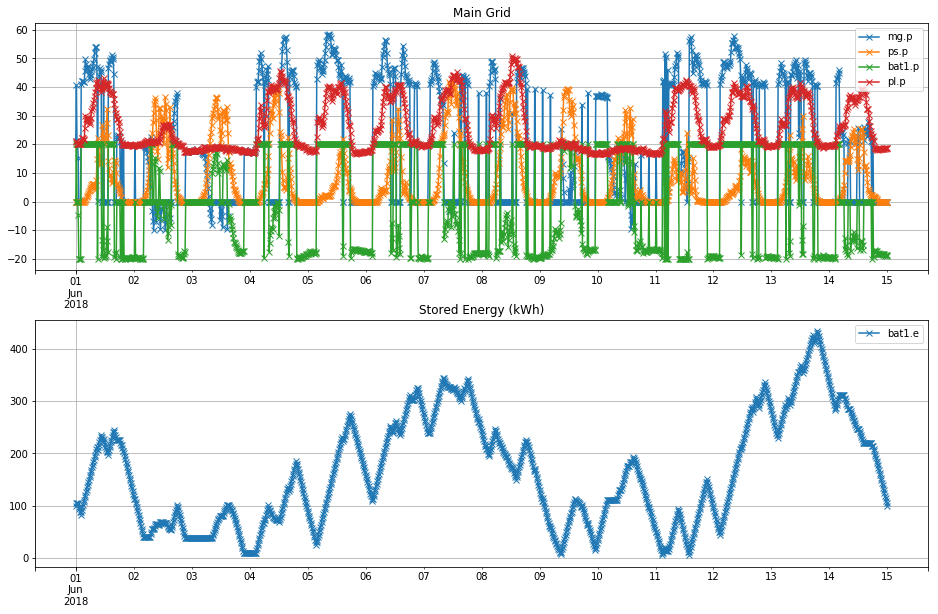

In [7]:
f = plt.figure(figsize=(16,10))
ax = f.subplots(2, 1)

pplot(m.mg.p, m.ps.p, m.bat1.p, m.pl.p, fig=f, ax=ax[0], index=t.datetime, legend=True, title='Main Grid', Marker='x')
plt.grid(True)
pplot(m.bat1.e, fig=f, ax=ax[1], index=t.datetime, legend=True, title='Stored Energy (kWh)', Marker='x')
plt.grid(True)
